# Libraries to Install and Import

In [1]:
# Data handling
import pandas as pd
import numpy as np

# Data visualization and EDA
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from wordcloud import WordCloud

# Text processing
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split


# Pre-trained word embeddings
import gensim.downloader as api  # For loading GloVe embeddings

# Deep learning
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dense, Dropout, GRU, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn.metrics import classification_report, confusion_matrix



# Saving and Loading Models
import os
import pickle

# Ensure NLTK stopwords are downloaded
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

# Full EDA & Visualization

## Load and Inspect Data

In [2]:
# Load the IMDB dataset
df = pd.read_csv("/kaggle/input/imdb-dataset-of-50k-movie-reviews/IMDB Dataset.csv")

# Display the first few rows and general information about the dataset
df.info()
df.describe()

# Checkign for missing values
print("Missing values per column:\n", df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB
Missing values per column:
 review       0
sentiment    0
dtype: int64


In [3]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


## Destibution of Sentiments

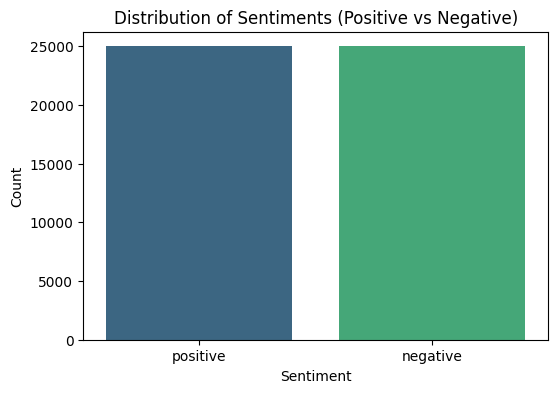

In [4]:
# Plot the distribution of sentiments
plt.figure(figsize=(6,4))
sns.countplot(x='sentiment', data=df, palette="viridis")
plt.title("Distribution of Sentiments (Positive vs Negative)")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()

## Text Lenght Analysis
THis cell will analyze the lenght of each review in terms of both characters and words.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


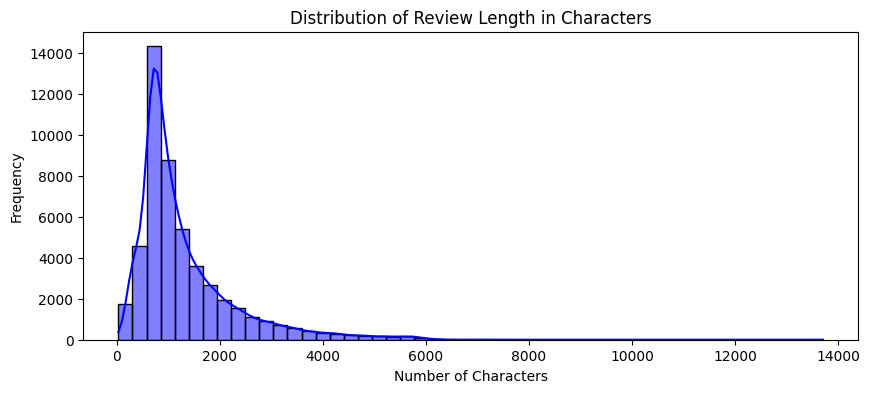

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


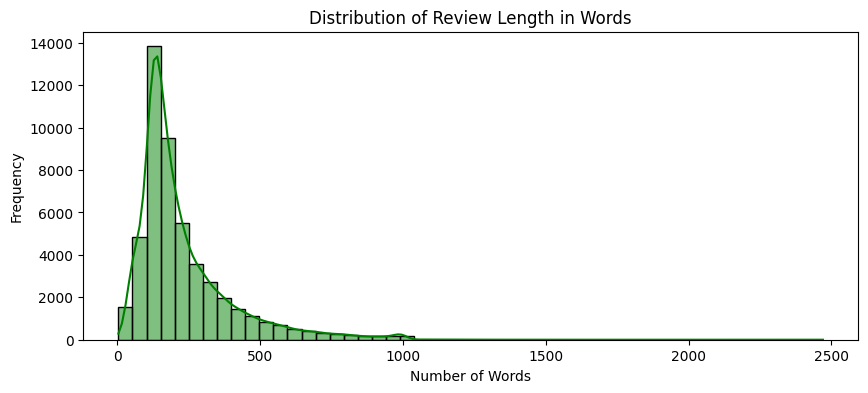

In [5]:
# Calculate text length in characters and words for each review
df['review_length_char'] = df['review'].apply(len)
df['review_length_word'] = df['review'].apply(lambda x: len(x.split()))

# Plot character-based review length distribution
plt.figure(figsize=(10,4))
sns.histplot(df['review_length_char'], bins=50, kde=True, color='blue')
plt.title("Distribution of Review Length in Characters")
plt.xlabel("Number of Characters")
plt.ylabel("Frequency")
plt.show()

# Plot word-based review length distribution
plt.figure(figsize=(10,4))
sns.histplot(df['review_length_word'], bins=50, kde=True, color='green')
plt.title("Distribution of Review Length in Words")
plt.xlabel("Number of Words")
plt.ylabel("Frequency")
plt.show()

## Unique Word Count Analysis
This cell calculates the number of unique words in each review.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


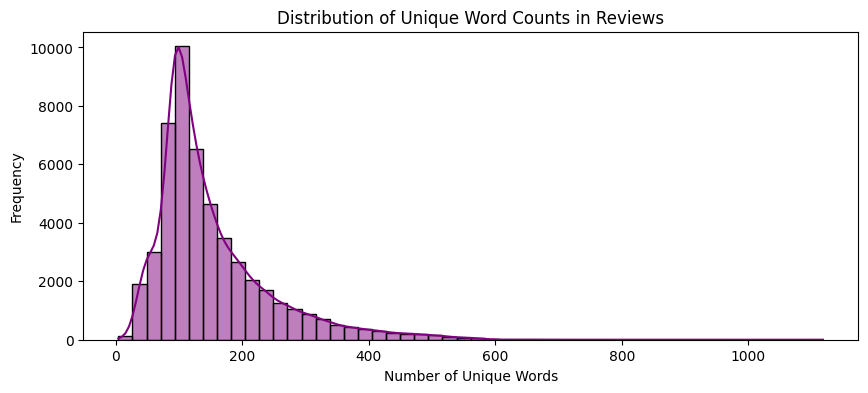

In [6]:
# Function to calculate unique word count
df['unique_word_count'] = df['review'].apply(lambda x: len(set(x.split())))

# Plot unique word count distribution
plt.figure(figsize=(10,4))
sns.histplot(df['unique_word_count'], bins=50, kde=True, color='purple')
plt.title("Distribution of Unique Word Counts in Reviews")
plt.xlabel("Number of Unique Words")
plt.ylabel("Frequency")
plt.show()

## Average Word Lenght Analysis
This cell will calculate and plot the average word lenght for each review.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


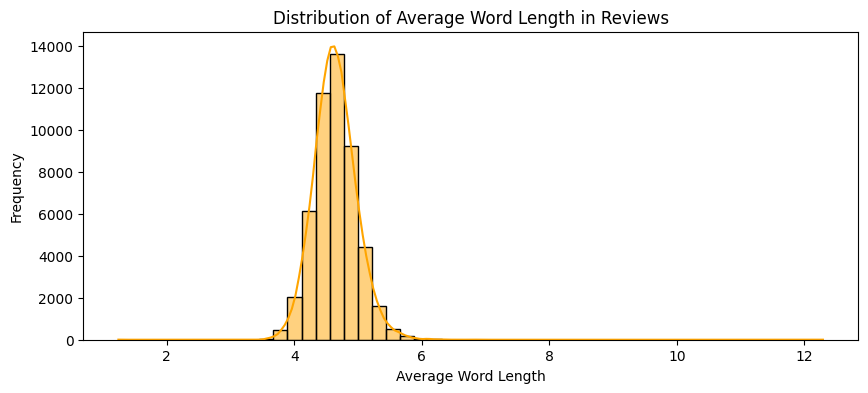

In [7]:
# Calculate the average word length in each review
df['avg_word_length'] = df['review'].apply(lambda x: np.mean([len(word) for word in x.split()]))

# Plot average word length distribution
plt.figure(figsize=(10,4))
sns.histplot(df['avg_word_length'], bins=50, kde=True, color='orange')
plt.title("Distribution of Average Word Length in Reviews")
plt.xlabel("Average Word Length")
plt.ylabel("Frequency")
plt.show()

## Most Common Words in Positive and Negative Reviews
This cell will display the most common words in positive and negative reeviews separately.

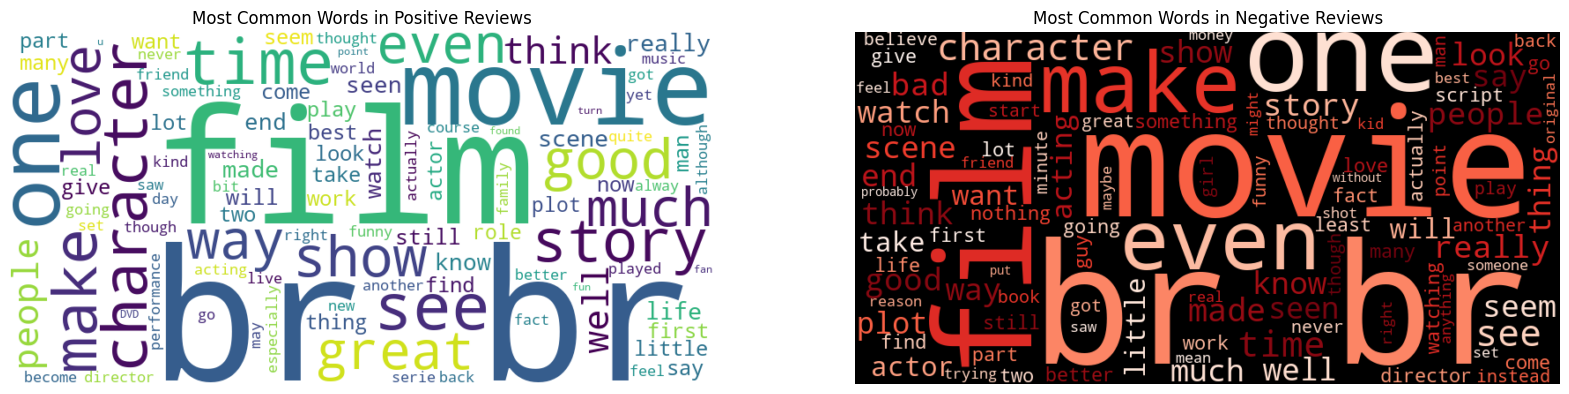

In [8]:
# Separate positive and negative reviews
positive_reviews = df[df['sentiment'] == 'positive']['review']
negative_reviews = df[df['sentiment'] == 'negative']['review']

# Function to get most common words
def get_common_words(text, num_words=50):
    words = ' '.join(text).lower().split()
    return Counter(words).most_common(num_words)

# Plot word clouds for positive and negative reviews
positive_wordcloud = WordCloud(width=800, height=400, max_words=100, background_color='white').generate(' '.join(positive_reviews))
negative_wordcloud = WordCloud(width=800, height=400, max_words=100, background_color='black', colormap='Reds').generate(' '.join(negative_reviews))

# Show word clouds
plt.figure(figsize=(20,8))
plt.subplot(1, 2, 1)
plt.imshow(positive_wordcloud, interpolation="bilinear")
plt.title("Most Common Words in Positive Reviews")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(negative_wordcloud, interpolation="bilinear")
plt.title("Most Common Words in Negative Reviews")
plt.axis("off")
plt.show()

## Sentiment-wise Review Lenght Comparison
This cell will compare the lenght of reviews between positive and negative sentiments.

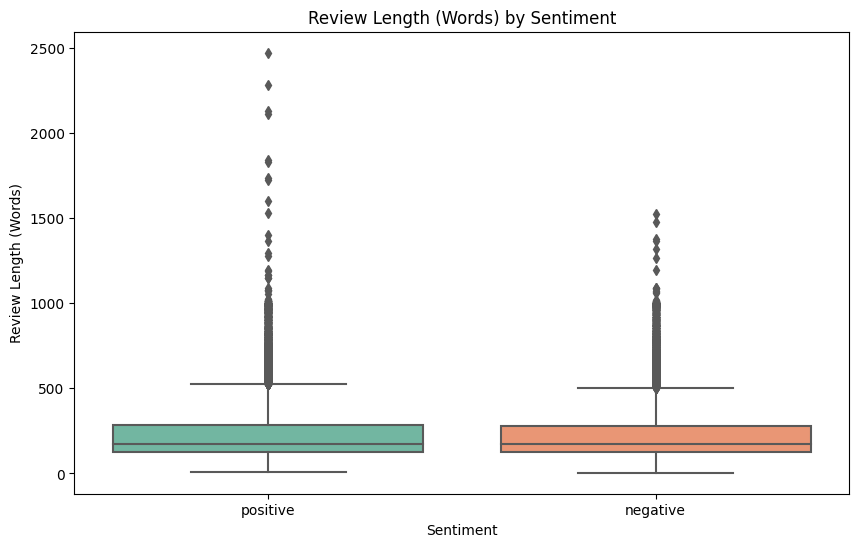

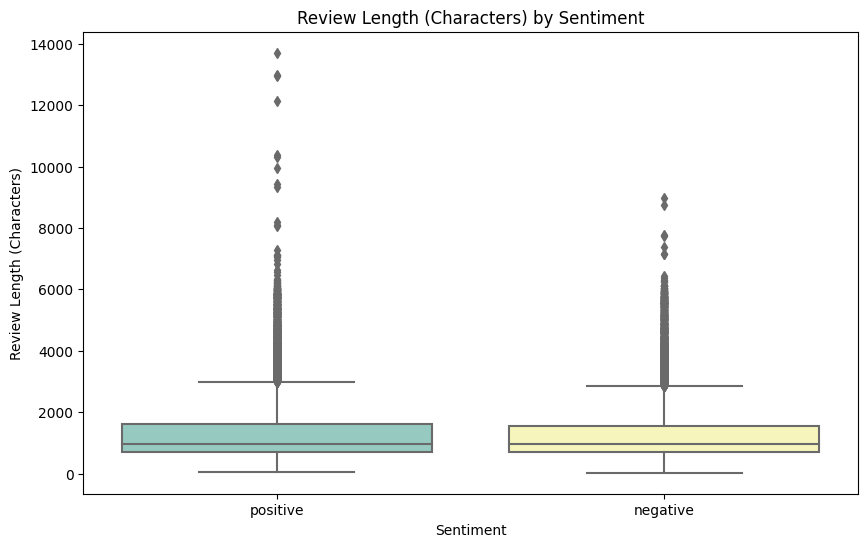

In [9]:
# Plot review length (words) distribution by sentiment
plt.figure(figsize=(10,6))
sns.boxplot(x='sentiment', y='review_length_word', data=df, palette="Set2")
plt.title("Review Length (Words) by Sentiment")
plt.xlabel("Sentiment")
plt.ylabel("Review Length (Words)")
plt.show()

# Plot review length (characters) distribution by sentiment
plt.figure(figsize=(10,6))
sns.boxplot(x='sentiment', y='review_length_char', data=df, palette="Set3")
plt.title("Review Length (Characters) by Sentiment")
plt.xlabel("Sentiment")
plt.ylabel("Review Length (Characters)")
plt.show()

# Text Preprocessing
Text preprocessing prepares the data for the neural network. We'll perform tasks like lowercasing, removing special characters, stopwprd remove, and tokenization.

In [10]:
# Required imports for text cleaning
from nltk.corpus import stopwords
import re

# Load stopwords
stop_words = set(stopwords.words('english'))

# Text preprocessing function
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove special characters and numbers
    text = re.sub(r'[^a-z\s]', '', text)
    # Remove stopwords
    words = text.split()
    words = [word for word in words if word not in stop_words]
    # Join the words back into a single string
    text = ' '.join(words)
    return text

# Apply the preprocessing function to the dataset
df['cleaned_review'] = df['review'].apply(preprocess_text)

# Text Tokenization and Padding
We'll convert words to integer indices using a tokenizer and pad the sequences to a fixed length for uniform input the model.

In [11]:
# Define tokenizer parameters
max_words = 20000  # maximum number of unique words to keep
max_sequence_length = 200  # maximum length of review sequences

# Tokenize the text
tokenizer = Tokenizer(num_words=max_words, oov_token='<OOV>')
tokenizer.fit_on_texts(df['cleaned_review'])

# Convert text to sequences
sequences = tokenizer.texts_to_sequences(df['cleaned_review'])

# Pad the sequences to a uniform length
X = pad_sequences(sequences, maxlen=max_sequence_length, padding='post')

# Encode labels (assuming sentiment is 'positive'/'negative')
df['sentiment'] = df['sentiment'].map({'positive': 1, 'negative': 0})
y = df['sentiment'].values

# Prepare GloVe Embeddings
Load pre_trained GloVe embeddings and create an embedding matrix that maps the tokenizer's word
index to the GloVe vectors.

In [12]:
# Download and load GloVe embeddings (assuming 100-dimensional)

embedding_dim = 100
embedding_index = {}
glove_path = "/kaggle/input/glove6b100dtxt/glove.6B.100d.txt"

# Load the GloVe embeddings
with open(glove_path, 'r', encoding='utf-8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        vector = np.asarray(values[1:], dtype='float32')
        embedding_index[word] = vector

# Create embedding matrix
embedding_matrix = np.zeros((max_words, embedding_dim))
for word, i in tokenizer.word_index.items():
    if i < max_words:
        embedding_vector = embedding_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector

In [13]:
# Split data into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)

# Build Bidirectional `GRU` Model
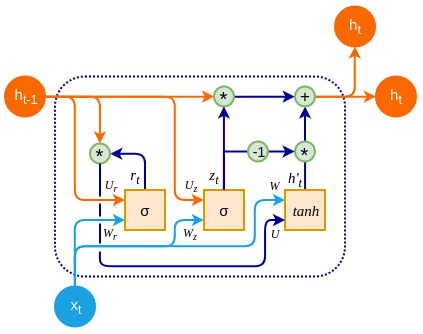
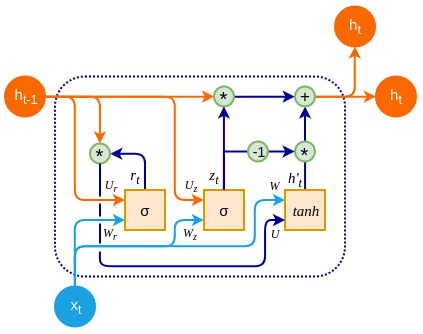

In [14]:
# We'll use a Bidirectional `GRU` model with an embedding layer initialized by the GloVe embeddings.
# Define Model
model = Sequential()
model.add(Embedding(input_dim=max_words, 
                    output_dim=embedding_dim, 
                    weights=[embedding_matrix], 
                    trainable=False))  # Embeddings are not trainable
model.add(Bidirectional(GRU(64, return_sequences=True)))
model.add(Dropout(0.5))
model.add(Bidirectional(GRU(32)))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Display model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │     2,000,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,000,000 (7.63 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 2,000,000 (7.63 MB)

# Multi-GPU Training Setup

In [15]:
# Set up multi-GPU training
try:
    strategy = tf.distribute.MirroredStrategy()
    with strategy.scope():
        parallel_model = model
    print("All GPUs Avaliable")
except:
    print("Multi-GPU training not enabled, using single GPU or CPU.")
    parallel_model = model

All GPUs Avaliable


# Model Training
Train the model with a validation set and save the best model during training.

In [16]:
# Model checkpoint callback to save the best model
checkpoint_cb = ModelCheckpoint('best_sentiment_model.keras', 
                                save_best_only=True, 
                                monitor='val_loss', 
                                mode='min', 
                                verbose=1)

# Train the model
history = parallel_model.fit(X_train, y_train, 
                             validation_data=(X_val, y_val),
                             epochs=20, 
                             batch_size=128, 
                             callbacks=[checkpoint_cb])

Epoch 1/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.6469 - loss: 0.6128
Epoch 1: val_loss improved from inf to 0.39271, saving model to best_sentiment_model.keras
313/313 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.6472 - loss: 0.6125 - val_accuracy: 0.8311 - val_loss: 0.3927
Epoch 2/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.8316 - loss: 0.3933
Epoch 2: val_loss improved from 0.39271 to 0.34384, saving model to best_sentiment_model.keras
313/313 ━━━━━━━━━━━━━━━━━━━━ 11s 34ms/step - accuracy: 0.8316 - loss: 0.3932 - val_accuracy: 0.8522 - val_loss: 0.3438
Epoch 3/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.8594 - loss: 0.3433
Epoch 3: val_loss improved from 0.34384 to 0.32449, saving model to best_sentiment_model.keras
313/313 ━━━━━━━━━━━━━━━━━━━━ 11s 34ms/step - accuracy: 0.8594 - loss: 0.3433 - val_accuracy: 0.8611 - val_loss: 0.3245
Epoch 4/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.8703 - loss: 0.3118
Epoch 4: val_l

# Plot Training History

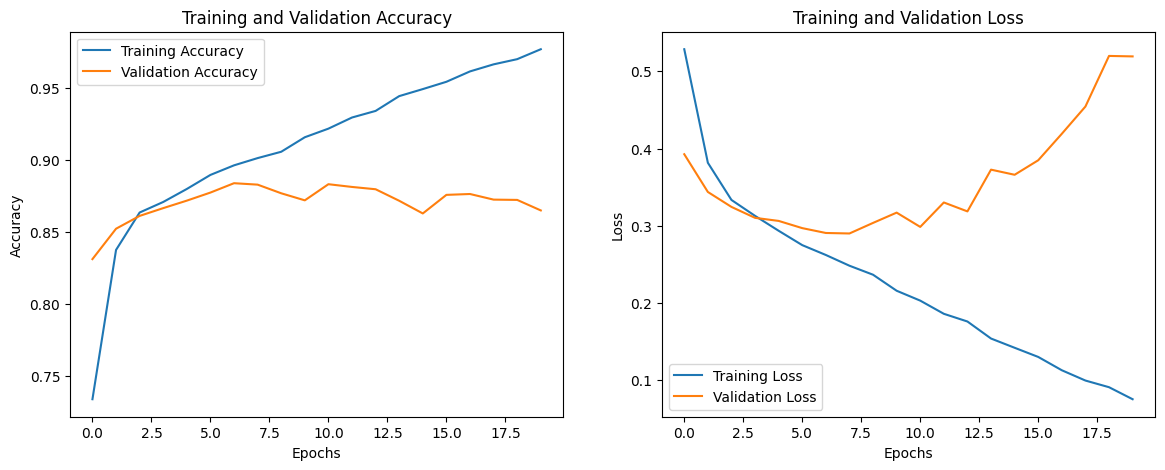

In [17]:
# Plot training and validation accuracy and loss
plt.figure(figsize=(14,5))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()

# Classification Report on Validation Data

In [18]:
# Predict labels for validation data
y_val_pred = (model.predict(X_val) > 0.5).astype("int32")

# Generate classification report
print("Classification Report:\n")
print(classification_report(y_val, y_val_pred, target_names=['Negative', 'Positive']))

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step
Classification Report:

              precision    recall  f1-score   support

    Negative       0.89      0.83      0.86      4961
    Positive       0.84      0.90      0.87      5039

    accuracy                           0.86     10000
   macro avg       0.87      0.86      0.86     10000
weighted avg       0.87      0.86      0.86     10000



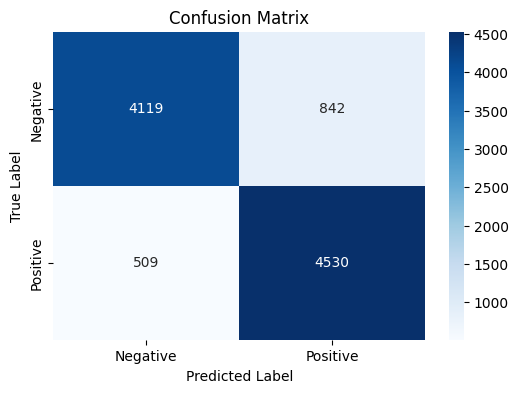

In [19]:
# Display the confusion matrix
cm = confusion_matrix(y_val, y_val_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Making Predictions on New Data

In [20]:
def preprocess_and_predict(text, model, tokenizer, max_sequence_length):
    # Preprocess the text
    cleaned_text = preprocess_text(text)  # Use the same preprocess_text function defined earlier
    # Convert text to sequence
    sequence = tokenizer.texts_to_sequences([cleaned_text])
    # Pad the sequence
    padded_sequence = pad_sequences(sequence, maxlen=max_sequence_length, padding='post')
    # Predict sentiment
    prediction = model.predict(padded_sequence)
    # Map prediction to sentiment label
    sentiment = 'Positive' if prediction >= 0.5 else 'Negative'
    return sentiment, prediction[0][0]

# Example usage
new_review = "The movie was absolutely fantastic, I loved every part of it!"
sentiment, confidence = preprocess_and_predict(new_review, model, tokenizer, max_sequence_length)
print(f"Sentiment: {sentiment}, Confidence: {confidence:.2f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Sentiment: Positive, Confidence: 1.00


# Save the Tokenizer and Model

In [21]:
# Save the tokenizer
with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

# Save the entire model
model.save('final_sentiment_model.h5')